In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
we_go = pd.read_csv('../data/partner_project_data.csv')

In [3]:
we_go.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
we_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

3,7,22,23,50,52,55,56
valuecounts
routeabbr
data is timepoints, wont have data for every point. 
multiple time points per trip, up to 7
loc[:5]


In [5]:
we_go.ROUTE_DIRECTION_NAME.value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [6]:
we_go.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.5,NaN


In [7]:
we_go1 = we_go[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR','TIME_POINT_ABBR', 'TRIP_EDGE','SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE','ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']]

In [8]:
we_go1.head(2)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1


In [9]:
we_go1.ROUTE_ABBR.value_counts()

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25959
7     18026
Name: count, dtype: int64

ax = sns.scatterplot(data = we_go1,
               x = 'ROUTE_ABBR',
               y = 'ADHERENCE',
               hue = 'ADJUSTED_ONTIME_COUNT',
               palette = 'husl');

for i in range(we_go1.shape[0]):
    plt.text(x=we_go1['ROUTE_ABBR'][i]+1,
        y=we_go1['ADHERENCE'][i],
        s=we_go1['ADJUSTED_ONTIME_COUNT'][i],
        fontsize=7,
        ha='center',
        va='bottom')
    
plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title(' Opiod Deaths per Sum of Opioids')
plt.xlabel('Sum of opioids')
plt.ylabel('Overdose Deaths')

#plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

<Axes: xlabel='ROUTE_ABBR', ylabel='ADHERENCE'>

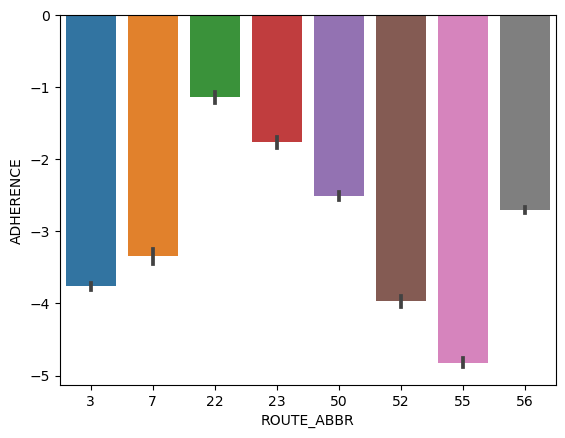

In [10]:
sns.barplot(x=we_go1['ROUTE_ABBR'], y=we_go1['ADHERENCE'])

In [11]:
we_go_scatter = we_go1.groupby('ROUTE_ABBR')['ADHERENCE'].value_counts().reset_index()

In [12]:
we_go_scatter['ADJUSTED_ONTIME_COUNT'] = we_go1['ADJUSTED_ONTIME_COUNT']

In [13]:
we_go_scatter

,ROUTE_ABBR,ADHERENCE,count,ADJUSTED_ONTIME_COUNT
0,3,-2.533333,153,1
1,3,-0.100000,141,1
2,3,-0.066666,138,1
3,3,-1.233333,131,1
4,3,-0.200000,129,1
...,...,...,...,...
16088,56,-27.266666,1,1
16089,56,14.650000,1,1
16090,56,14.566666,1,1
16091,56,-105.833333,1,1


ax = sns.scatterplot(data=we_go_scatter,
                     x='ROUTE_ABBR',
                     y='ADHERENCE',
                     hue='ADJUSTED_ONTIME_COUNT',
                     palette='husl')

# Adding text annotations
for i in range(we_go_scatter.shape[0]):
    plt.text(x=we_go_scatter['ROUTE_ABBR'][i] + 1,
             y=we_go_scatter['ADHERENCE'][i],
             s=we_go_scatter['ADJUSTED_ONTIME_COUNT'][i],
             fontsize=7,
             ha='center',
             va='bottom')

# Setting the minimum value for the y-axis
ax.set_ylim(bottom=we_go_scatter['ADHERENCE'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('Opioid Deaths per Sum of Opioids')
plt.xlabel('Sum of opioids')
plt.ylabel('Overdose Deaths')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

In [14]:
wego_22 = we_go[we_go['ROUTE_ABBR']==22]

In [15]:
wego_22_no2 = wego_22[wego_22['TRIP_EDGE']!=2]

In [16]:
wego_22_no0 = wego_22[wego_22['TRIP_EDGE']!=0]

In [17]:
wego_22_no2o0 = wego_22[wego_22['TRIP_EDGE']!=2]

In [18]:
wego_22_no2o0 = wego_22_no2o0[wego_22_no2o0['OPERATOR']>0]

we_go.groupby('ADHERENCE')['OPERATOR'].value_counts(<0)

In [19]:
operator_adherence = wego_22.groupby('ADHERENCE')['OPERATOR'].value_counts().reset_index()

In [20]:
operator_adherence.head(100)

,ADHERENCE,OPERATOR,count
0,-675.000000,1743,1
1,-295.466666,2630,1
2,-134.100000,3015,1
3,-118.100000,1762,1
4,-117.066666,2362,1
...,...,...,...
95,-18.383333,2335,1
96,-18.333333,2580,1
97,-18.266666,2832,1
98,-18.183333,2531,1


In [21]:
operator_adherence.OPERATOR.nunique()

110

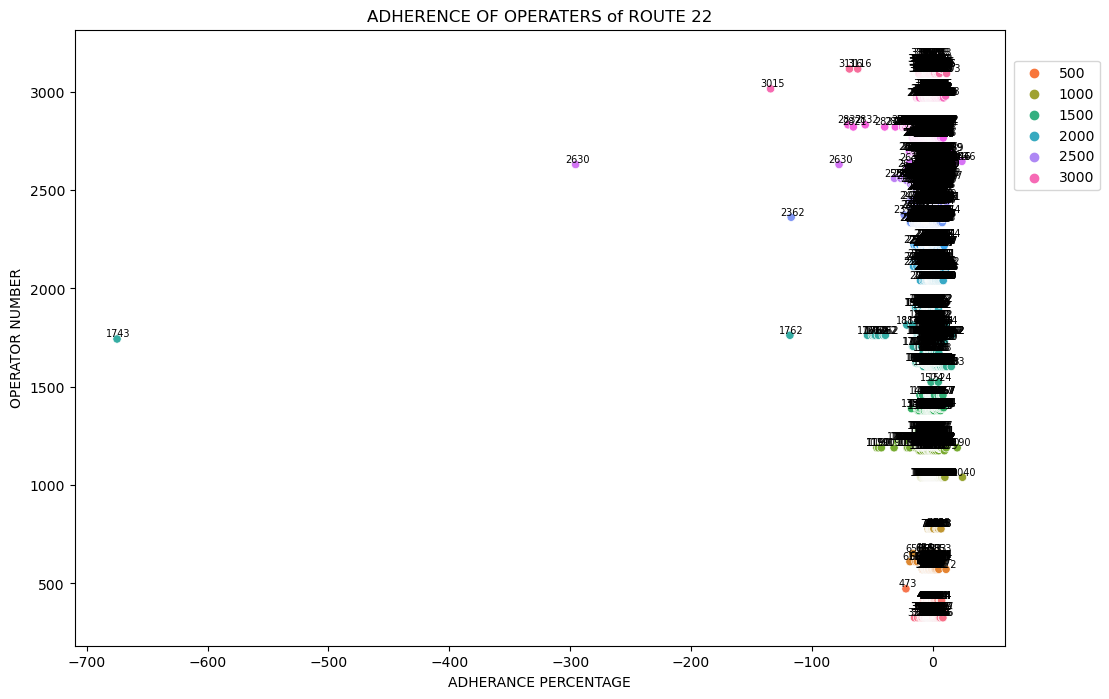

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=operator_adherence,
                     x='ADHERENCE',
                     y='OPERATOR',
                     hue='OPERATOR',
                     palette='husl')

# Adding text annotations
for i in range(operator_adherence.shape[0]):
    plt.text(x=operator_adherence['ADHERENCE'][i]+1.3,
             y=operator_adherence['OPERATOR'][i]+.7,
             s=operator_adherence['OPERATOR'][i],
             fontsize=7,
             ha='center',
             va='bottom')

# Setting the minimum value for the y-axis
#ax.set_ylim(bottom=we_go_scatter['OPERATOR'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('ADHERENCE OF OPERATERS of ROUTE 22')
plt.xlabel('ADHERANCE PERCENTAGE')
plt.ylabel('OPERATOR NUMBER')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

## 1743, 2630, 3015, 1762, 2362, outlier operators for route 22

In [30]:
outlier_operators = operator_adherence[operator_adherence['OPERATOR'].isin([1743, 2630, 3015, 1762, 2362])]

In [31]:
outlier_operators

,ADHERENCE,OPERATOR,count
0,-675.000000,1743,1
1,-295.466666,2630,1
2,-134.100000,3015,1
3,-118.100000,1762,1
4,-117.066666,2362,1
...,...,...,...
14701,14.183333,1762,1
14703,15.316666,1762,1
14705,15.733333,1762,1
14706,15.933333,1762,1


In [25]:
outlier_operators

,ADHERENCE,OPERATOR,count
0,-675.000000,1743,1
1,-295.466666,2630,1
2,-134.100000,3015,1
3,-118.100000,1762,1
4,-117.066666,2362,1
...,...,...,...
14701,14.183333,1762,1
14703,15.316666,1762,1
14705,15.733333,1762,1
14706,15.933333,1762,1


KeyError: 6

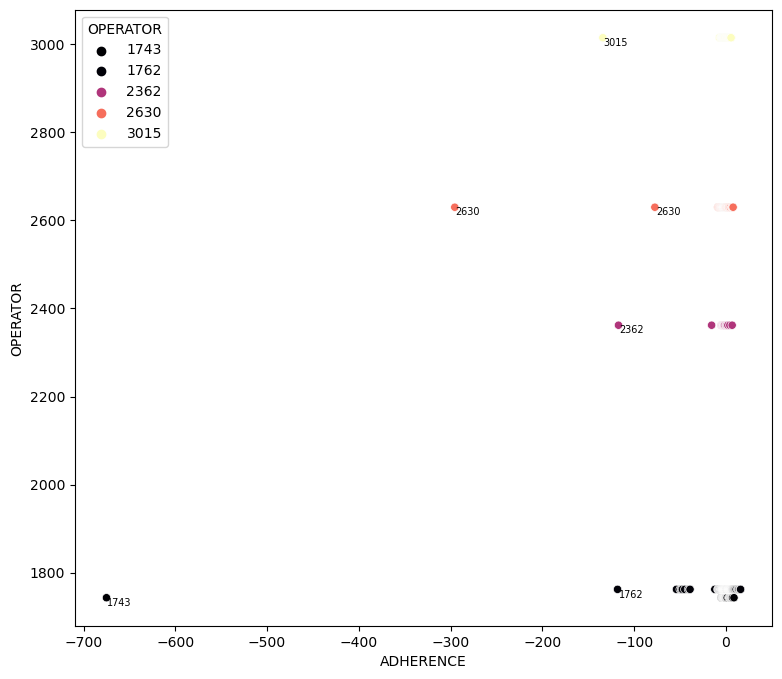

In [26]:
plt.figure(figsize=(9,8))
ax = sns.scatterplot(data=outlier_operators,
                     x='ADHERENCE',
                     y='OPERATOR',
                     hue='OPERATOR',
                     palette='magma')

for i in range(outlier_operators.shape[0]):
    plt.text(x=outlier_operators['ADHERENCE'][i] + 1,
             y=outlier_operators['OPERATOR'][i],
             s=outlier_operators['OPERATOR'][i],
             fontsize=7,
             ha='left',
             va='top')

#ax.set_ylim(bottom=we_go_scatter['OPERATOR'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('ADHERENCE OF OPERATERS of ROUTE 22')
plt.xlabel('ADHERANCE PERCENTAGE')
plt.ylabel('OPERATOR NUMBER')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

In [ ]:
outlier_operators.head()

In [ ]:
sns.barplot(x=outlier_operators['OPERATOR'], y=outlier_operators['ADHERENCE'])

In [ ]:
wego_operator_1743=wego_22[wego_22['OPERATOR']==1743]

In [ ]:
wego_operator_1743.head(2)

In [ ]:
new_frame = we_go[['DATE','ADHERENCE','HDWY_DEV','LATITUDE','LONGITUDE','OPERATOR','SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME']]

In [ ]:
new_frame

In [ ]:
dates=wego_operator_1743.groupby('DATE')['ADHERENCE'].value_counts().reset_index()

In [ ]:
dates.head()

In [ ]:
plt.figure(figsize=(9,8))
ax = sns.scatterplot(data=dates,
                     x='ADHERENCE',
                     y='DATE',
                     hue='DATE',
                     palette='magma')

# Adding text annotations
for i in range(dates.shape[0]):
    plt.text(x=dates['ADHERENCE'][i] + 1,
             y=dates['DATE'][i],
             s=dates['DATE'][i],
             fontsize=7,
             ha='left',
             va='top')

# Setting the minimum value for the y-axis
#ax.set_ylim(bottom=we_go_scatter['OPERATOR'].min())

plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)

plt.title('ADHERENCE OF OPERATERS of ROUTE 22')
plt.xlabel('ADHERANCE PERCENTAGE')
plt.ylabel('OPERATOR NUMBER')

# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

In [ ]:
new_frame

In [ ]:
new_frame_route22 = new_frame[new_frame['OPERATOR'].isin([1743, 2630, 3015, 1762, 2362])]

In [ ]:
i = 0
for row_index, row_values in new_frame.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

In [ ]:
area_center = (36.1659, 86.7844)

In [ ]:
#draw our zip code area: 37207
publicartmap = folium.Map(location =  area_center, zoom_start = 12)

#folium.GeoJson(polygonpublicart).add_to(publicartmap)

#publicartzipurl = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tn_tennessee_zip_codes_geo.min.json'
#publicartzip = requests.get(publicartzipurl).json()
#folium.GeoJson(publicartzip, name='ZipCode').add_to(publicartmap)
#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in new_frame.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = f"Scheduled_Time: {row_values['SCHEDULED_TIME']}<br>Arrival_Time:{row_values['ACTUAL_ARRIVAL_TIME']}<br>Departure_Time:{row_values['ACTUAL_DEPARTURE_TIME']}<br>Adherence:{row_values['ADHERENCE']}"
    icon=folium.Icon(color="orange",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(publicartmap)
#map_37207.save('../maps/map37207.html')

#display our map
publicartmap

In [ ]:
i = 0
for row_index, row_values in new_frame_route22.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

In [ ]:
area_center = (36.14883, -86.73239)

In [ ]:
#draw our zip code area: 37207
publicartmap = folium.Map(location =  area_center, zoom_start = 12)

#folium.GeoJson(polygonpublicart).add_to(publicartmap)

#publicartzipurl = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tn_tennessee_zip_codes_geo.min.json'
#publicartzip = requests.get(publicartzipurl).json()
#folium.GeoJson(publicartzip, name='ZipCode').add_to(publicartmap)
#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in new_frame_route22.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = f"Scheduled_Time: {row_values['SCHEDULED_TIME']}<br>Arrival_Time:{row_values['ACTUAL_ARRIVAL_TIME']}<br>Departure_Time:{row_values['ACTUAL_DEPARTURE_TIME']}<br>Adherence:{row_values['ADHERENCE']}"
    icon=folium.Icon(color="orange",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(publicartmap)
#map_37207.save('../maps/map37207.html')

#display our map
publicartmap